# 02 Pembelajaran Mesin Berselia -- Regresi

Oleh: Murthadza bin Aznam <br/>
Tarikh: 3 Ogos 2021<br/>

Nota interaktif ini ditulis sebagai sebahagian daripada kursus _International Virtual Conference on Astrostatistics and Machine Learning_ (IVCASML2021).

---

## 0.0 MATLAMAT
1. Ingin menguji model regresi linear yang digunakan oleh `scikit-learn` menggunakan data yang dihasilkan secara rawak
2. Ingin menggunakan model regresi linear untuk mengenalpasti hubungkait antara suhu dan kekonduksian

---

## TUGAS A | DATA YANG DIHASILKAN SECARA RAWAK
## A-1.0 PERSIAPAN

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

%matplotlib inline

### A-1.1 PERSIAPAN DATA

Kita akan hasilkan plot garis lurus berserta hingar
$$y = mx + c + \text{hingar}$$

In [4]:
sample_size = 100000
slope = 5
y_intercept = 0

fuzziness = 10.0 # Menetapkan darjah gangguan hingar

x_obs = np.random.uniform(low=0.0, high=100.0, size=sample_size)
noise = np.random.normal(loc=0.0, scale=fuzziness, size=sample_size)

# Garis lurus berserta hingar
y_obs = slope*x_obs + y_intercept + noise

## A-2.0 REGRESI LINEAR SCIKIT-LEARN

### A-2.1 PEMBENTUKAN SEMULA DATA
Kita perlu bentuk semula data menggunakan `nparray.reshape(-1,1)` supaya boleh dimuatkan dalam model `scikit-learn` 

In [6]:
x = x_obs.reshape(-1,1)

y = y_obs.reshape(-1,1)

### A-2.2 MENGGUNAKAN SCIKIT-LEARN
Kita dapati nilai yang diteka oleh `scikit-learn` adalah hampir dengan nilai yang kita tetapkan

In [7]:
# Menggunalan kelas LinearRegression daripada sklearn
model = LinearRegression()

model.fit(x, y)

print("Model meramalkan pemalar kecerunan ialah: ", model.coef_)
print("Pemalar kecerunan yang sebenar ialah: ", slope)
print("---")
print("Model meramalkan persilangan y ialah: ", model.intercept_)
print("Persilangan y yang sebenar ialah: ", y_intercept)

Model meramalkan pemalar kecerunan ialah:  [[4.99984616]]
Pemalar kecerunan yang sebenar ialah:  5
---
Model meramalkan persilangan y ialah:  [-0.04170808]
Persilangan y yang sebenar ialah:  0


## TUGAS B | HUBUNGKAIT ANTARA SUHU DAN KEKONDUKSIAN
### B-1.0 PERSIAPAN
Datanya diperoleh daripada `../dataset/Temp_vs_Cond.csv`

In [8]:
df = pd.read_csv('../dataset/Temp_vs_Cond.csv')

df

,Temperature,Conductance
0,300,0.084
1,400,0.098
2,500,0.109
3,600,0.120
4,700,0.127


Text(0.5, 1.0, 'Suhu vs Kekonduksian')

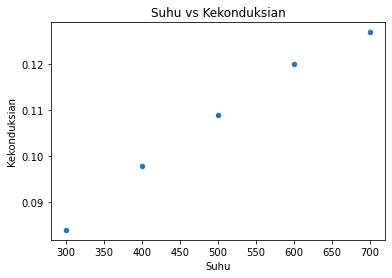

In [9]:
df.plot(kind='scatter', x='Temperature',y='Conductance')
plt.xlabel('Suhu')
plt.ylabel('Kekonduksian')
plt.title('Suhu vs Kekonduksian')

## B-2.0 MENGGUNAKAN SCIKIT-LEARN

### B-2.1 MEMUATKAN DATA
Kita bentukkan data yang guna `nparray.reshape(-1,1)` kemudian masukkan dalam `LinearRegression`

In [10]:
T = df['Temperature'].to_numpy().reshape(-1,1)
C = df['Conductance'].to_numpy()

lr = LinearRegression()
lr.fit(T,C)
print('Pemalar =', lr.coef_)
print('Persilangan y =',lr.intercept_)

Pemalar = [0.000108]
Persilangan y = 0.05360000000000003


### B-2.1 PLOT

Text(0.5, 1.0, 'Ramalan melawan data')

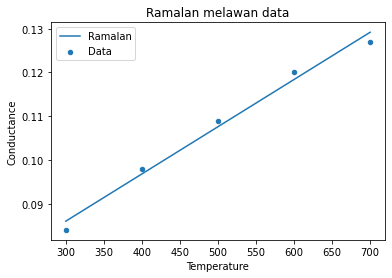

In [11]:
x = np.linspace(df['Temperature'].min(),df['Temperature'].max())
prediction = lr.coef_[0]*x + lr.intercept_

df.plot(kind='scatter', x='Temperature',y='Conductance', label="Data")
plt.plot(x, prediction, label="Ramalan")
plt.legend()
plt.title("Ramalan melawan data")